In [1]:
# Author: Stephen Sheridan
import pandas as pd
import pylab
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# Set default pylab stuff
%matplotlib inline
pylab.rcParams['figure.figsize'] = (13.0, 5.0)
#pylab.rcParams['axes.grid'] = True

In [3]:
# Load the wine data from the csv file
wine_df = pd.read_csv('data/winemag-data.csv')
#wine_df.dropna(inplace=True)
# Display the top 10 rows of the  wine dataframe
wine_df.head()
#wine_df.to_csv('data/winemag-data.csv', index=False)

,country,designation,points,price,province,region_1,taster_name,title,variety,winery
0,US,Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
1,US,Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
2,Spain,Ars In Vitro,87,15.0,Northern Spain,Navarra,Michael Schachner,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
3,Italy,Belsito,87,16.0,Sicily & Sardinia,Vittoria,Kerin O’Keefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
4,France,Les Natures,87,27.0,Alsace,Alsace,Roger Voss,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam


In [33]:
# Most of the descriptive stats discussed below can be calculated
# using one handy function in Pandas
wine_df.describe()

,points,price
count,54170.000000,54170.000000
mean,88.966550,39.209341
std,2.955188,36.154076
min,80.000000,4.000000
25%,87.000000,20.000000
50%,89.000000,30.000000
75%,91.000000,48.000000
max,100.000000,2013.000000


In [5]:
# Get the mean score
mean_score = wine_df['points'].mean()
# Get the mean price
mean_price = wine_df['price'].mean()
# Print the results
print("Mean score = " + str(mean_score))
print("Mean price = " + str(mean_price))


Mean score = 88.96654975078457
Mean price = 39.209340963633004


In [6]:
# Get the median score
median_score = wine_df['points'].median()
# Get the median price
median_price = wine_df['price'].median()
# Print the results
print("Median score = " + str(median_score))
print("Median price = " + str(median_price))



Median score = 89.0
Median price = 30.0


In [7]:
# Get the minimum price
min_price = wine_df['price'].min()
# Get the maximum price
max_price = wine_df['price'].max()
# Print the results
print("Min price = " + str(min_price))
print("Max price = " + str(max_price))

Min price = 4.0
Max price = 2013.0


In [8]:
# Get the mode for price
mode_price = wine_df['price'].mode()

# Print result
print("Price mode = " + str(mode_price[0]))

Price mode = 20.0


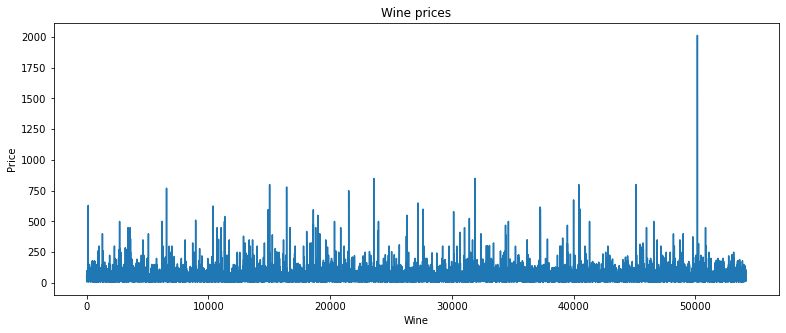

In [9]:
ax = wine_df['price'].plot(title='Wine prices')
ax.set_xlabel('Wine')
ax.set_ylabel('Price')
plt.savefig("figs/price_bar.pdf")

In [10]:
# Calculate the price range
price_range = max_price - min_price

# Print result
print("Price range = " + str(price_range))


Price range = 2009.0


In [11]:
# Get the score standard deviaiton
score_std = wine_df['points'].std()
# Get the price standard deviaiton
price_std = wine_df['price'].std()

# Print the results
print("Standard deviation of score = " + str(score_std))
print("Standard deviation of price = " + str(price_std))

Standard deviation of score = 2.955188430774286
Standard deviation of price = 36.15407596129577


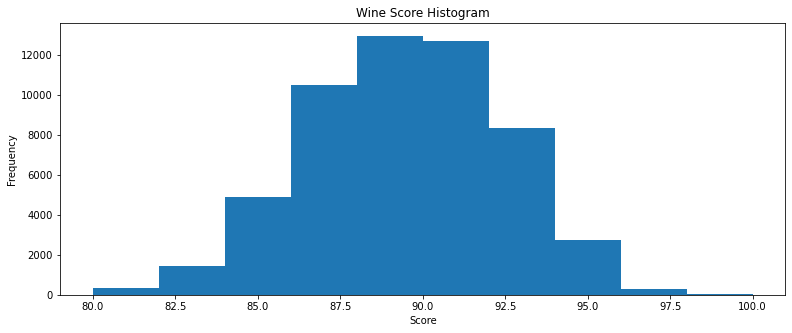

In [12]:
# Plot the score values on a histogram
# this uses 10 bins default
ax = wine_df['points'].plot(kind='hist')
ax.set_xlabel('Score')
ax.set_title("Wine Score Histogram")
plt.savefig("figs/point_hist.pdf")

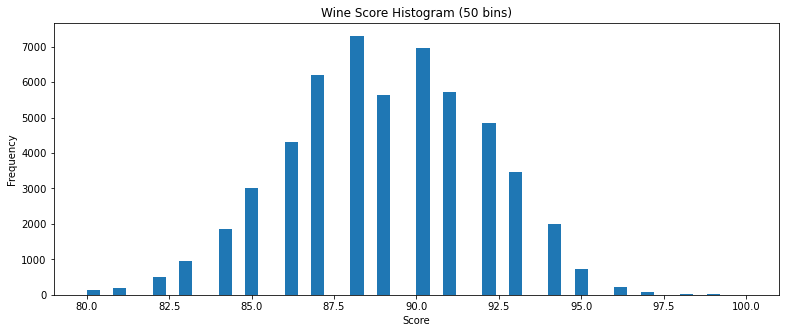

In [13]:
# Plot the score values on a histogram with BINS=50
ax = wine_df['points'].plot(kind='hist', bins=50)
ax.set_xlabel('Score')
ax.set_title("Wine Score Histogram (50 bins)")
plt.savefig("figs/point_hist_50bins.pdf")

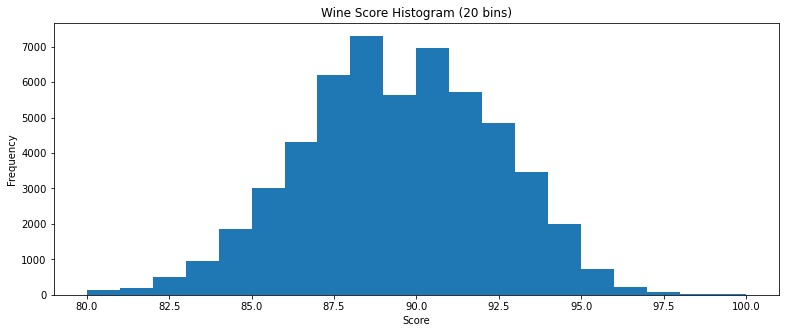

In [35]:
# Plot the score values on a histogram with BINS=20
ax = wine_df['points'].plot(kind='hist', bins=20)
ax.set_xlabel('Score')
ax.set_title("Wine Score Histogram (20 bins)")
plt.savefig("figs/point_hist_20bins.pdf")

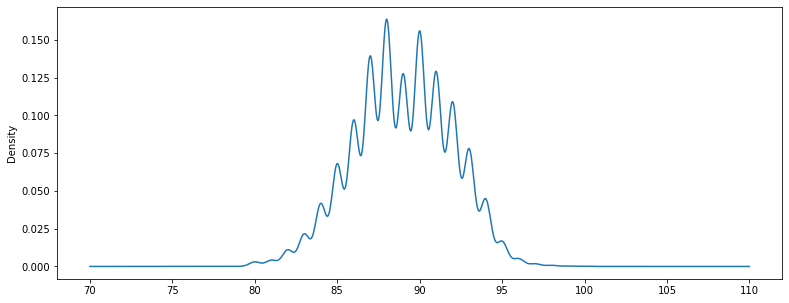

In [37]:
# Plot the density of points values
wine_df['points'].plot.kde()
plt.savefig("figs/points_kde.pdf")

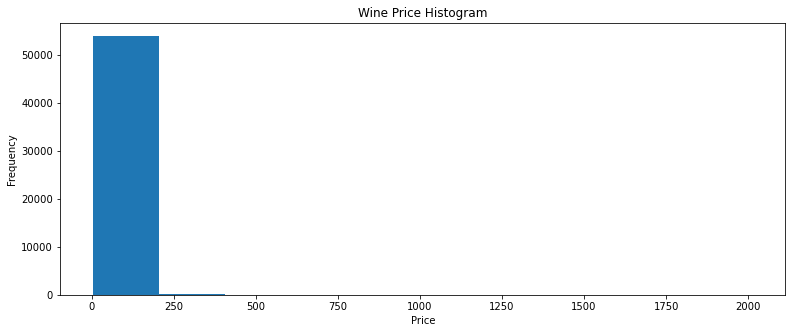

In [16]:
# Plot the price values on a histogram
ax = wine_df['price'].plot(kind='hist')
ax.set_xlabel('Price')
ax.set_title("Wine Price Histogram")
plt.savefig("figs/price_hist.pdf")

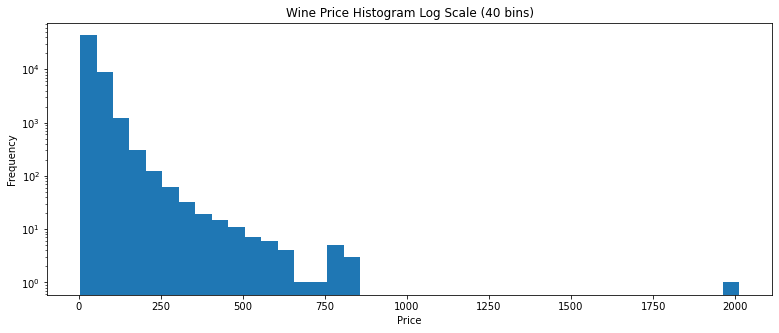

In [17]:
# Plot the price values on a histogram
ax = wine_df['price'].plot(kind='hist', logy=True, bins=40)
ax.set_xlabel('Price')
ax.set_title("Wine Price Histogram Log Scale (40 bins)")
plt.savefig("figs/price_hist_40bins.pdf")

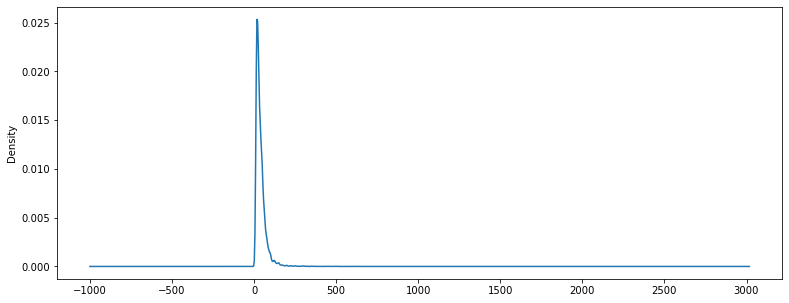

In [18]:
# Plot the density of price values
# Prices appear to be squashed into a very narrow spike, this is because of the outlier at ~2000
wine_df['price'].plot.kde()
plt.savefig("figs/price_kde.pdf")

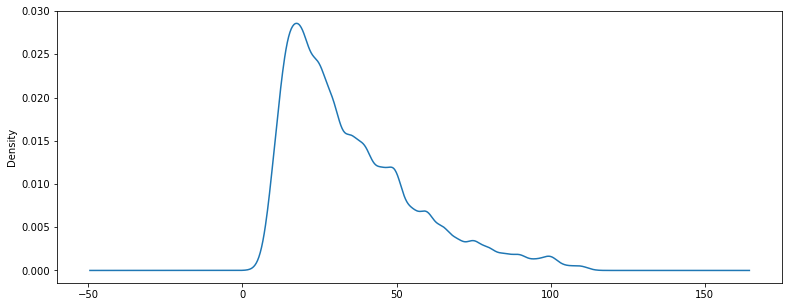

In [19]:
# We can use the standard deviation to remove the outliers
# Plot the density of price values from 0 to mean + 2 standard deviations
wine_ex_outliers = wine_df[wine_df.price < (mean_price + (price_std*2))]
#wine_ex_outliers = wine_df
wine_ex_outliers['price'].plot.kde()
plt.savefig("figs/price_ex_outlier_kde.pdf")

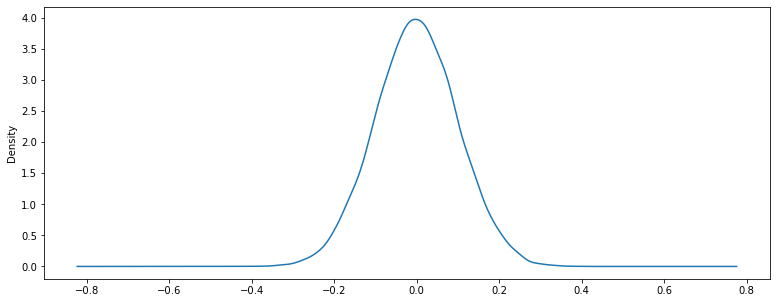

In [20]:
# Lets generate some normally distributed data and plot it using a Kernel Density Plot
mu, sigma = 0, 0.1 # mean and standard deviation
random_values = np.random.normal(mu, sigma, 10000)
random_df = pd.DataFrame(random_values, columns=['value'])
random_df['value'].plot.kde()
plt.savefig("figs/normal_kde.pdf")

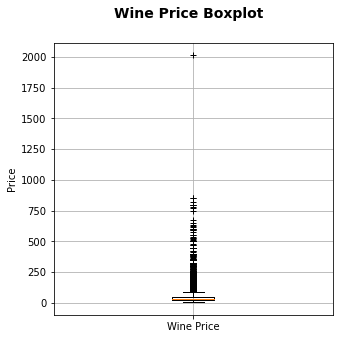

In [21]:
# figure related code
fig = plt.figure(figsize=(5,5))
fig.suptitle('Wine Price Boxplot', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
ax.boxplot(wine_df['price'],sym='+')
plt.xticks([1], ['Wine Price'])
ax.set_ylabel('Price')
plt.grid()
plt.show()
fig.savefig("figs/price_boxplot.pdf")

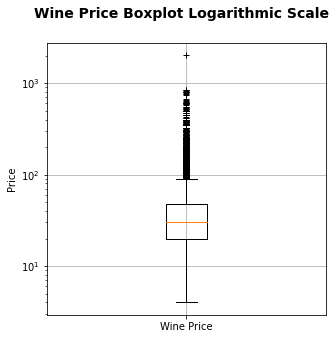

In [22]:
# figure related code
fig = plt.figure(figsize=(5,5))
fig.suptitle('Wine Price Boxplot Logarithmic Scale', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
ax.boxplot(wine_df['price'],sym='+')
plt.xticks([1], ['Wine Price'])
ax.set_ylabel('Price')
ax.set_yscale("log")
plt.grid()
plt.show()
fig.savefig("figs/price_log_boxplot.pdf")

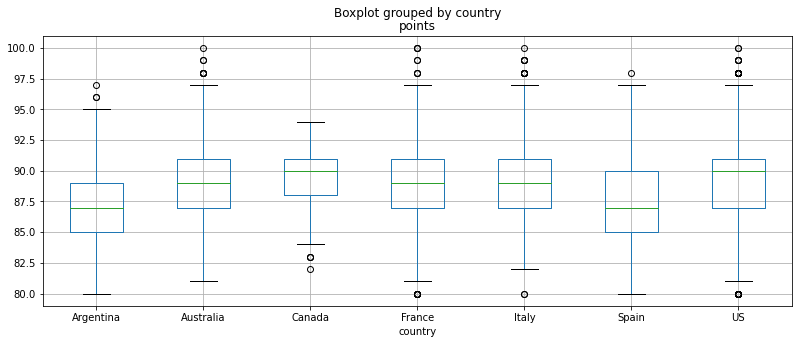

In [23]:
# We can look at the spread of scores by country
ax = wine_df.boxplot(column='points',by='country')
plt.savefig("figs/points_by_country_boxplot.pdf")

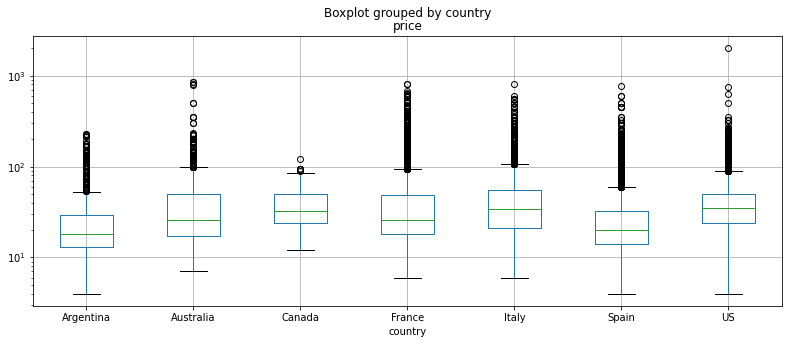

In [24]:
# We can look at the spread of prices by country
ax = wine_df.boxplot(column='price',by='country')
ax.set_yscale("log")
plt.savefig("figs/price_by_country_boxplot.pdf")

Text(0.5, 0, 'Sample')

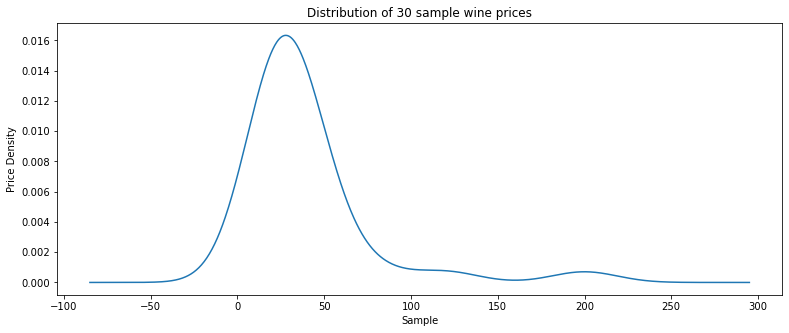

In [26]:
wine_sample = wine_df.sample(n=30)
ax = wine_sample['price'].plot.kde()
ax.set_title("Distribution of 30 sample wine prices")
ax.set_ylabel('Price Density')
ax.set_xlabel('Sample')

In [27]:
# What is the mean of the sample
wine_sample.mean()

points    89.633333
price     39.333333
dtype: float64

In [28]:
# What is the STD of the mean
wine_sample.std()

points     2.525502
price     37.227477
dtype: float64

In [29]:
# How does the points score correlate with the price?
wine_df.corr()

,points,price
points,1.000000,0.452794
price,0.452794,1.000000


In [31]:
# Hypothesis
print("Sample of 30 random points has mean in line with population mean")
# Population 
pop_mean =  wine_df['points'].mean()
print("Population mean points " + str(pop_mean))

# Random sample of 30 wines
sample_mean = wine_sample['points'].mean()
print("Sample mean points " + str(sample_mean))

# Test to see if the mean of the sample is agree
results =  stats.ttest_1samp(wine_sample['points'], pop_mean)


print("Stat score = %.6f" % results[0])
print("P-value = %.6f" % results[1])
print("Accept NULL hypothesis if p-value > stat score")

Sample of 30 random points has mean in line with population mean
Population mean points 88.96654975078457
Sample mean points 89.63333333333334
Stat score = 1.446098
P-value = 0.158872
Accept NULL hypothesis if p-value > stat score


In [32]:
# Hypothesis
print("Sample of 30 random points has mean of 50")
# Population 
pop_mean =  wine_df['points'].mean()
print("Population mean points " + str(pop_mean))

# Random sample of 30 wines
sample_mean = wine_sample['points'].mean()
print("Sample mean points " + str(sample_mean))

# Test to see if the mean of the sample is agree
results =  stats.ttest_1samp(wine_sample['points'], 50)


print("Stat score = %.6f" % results[0])
print("P-value = %.6f" % results[1])
print("Accept NULL hypothesis if p-value > stat score")

Sample of 30 random points has mean of 50
Population mean points 88.96654975078457
Sample mean points 89.63333333333334
Stat score = 85.955464
P-value = 0.000000
Accept NULL hypothesis if p-value > stat score
